In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [15]:
loan_approve = pd.read_csv('dataset.csv')

In [16]:
loan_approve.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


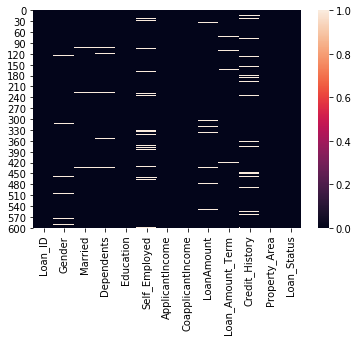

In [17]:
sns.heatmap(loan_approve.isnull())  #heat map to analyse missing data

In [18]:
loan_approve['Dependents'].replace(np.NaN,loan_approve['Dependents'].mode()[0],inplace=True)
loan_approve['Married'].replace(np.NaN,loan_approve['Married'].mode()[0],inplace=True)
loan_approve['Gender'].replace(np.NaN,loan_approve['Gender'].mode()[0],inplace=True)
loan_approve['Credit_History'].replace(np.NaN,loan_approve['Credit_History'].mode()[0],inplace=True)
loan_approve['Self_Employed'].replace(np.NaN,loan_approve['Self_Employed'].mode()[0],inplace=True)

In [19]:
loan_approve['LoanAmount'].replace(np.NaN,loan_approve['LoanAmount'].mean(),inplace=True)
loan_approve['Loan_Amount_Term'].replace(np.NaN,loan_approve['Loan_Amount_Term'].mean(),inplace=True)

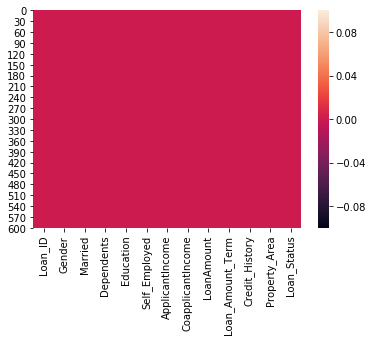

In [20]:
sns.heatmap(loan_approve.isnull())

In [21]:
loan_approve.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [271]:
b1  = pd.get_dummies(loan_approve['Gender'],drop_first=True)
b2  = pd.get_dummies(loan_approve['Married'],drop_first=True)
b3  = pd.get_dummies(loan_approve['Self_Employed'],drop_first=True)
b4  = pd.get_dummies(loan_approve['Property_Area'],drop_first=True)
b5 = pd.get_dummies(loan_approve['Education'],drop_first=True)
b6 = pd.get_dummies(loan_approve['Loan_Status'],drop_first=True)
b7 = pd.get_dummies(loan_approve['Dependents'],drop_first=True)

In [270]:
loan_train2 = pd.concat([b1,b2,b3,b4,b5,b6,b7,loan_approve],axis=1)

,N,Y
0,0,1
1,1,0
2,0,1
3,0,1
4,0,1
...,...,...
609,0,1
610,0,1
611,0,1
612,0,1


In [25]:
loan_train2.head()

,Male,Yes,Yes,Semiurban,Urban,Not Graduate,Y,1,2,3+,...,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,1,0,1,0,0,0,...,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,1,1,0,0,0,0,0,1,0,0,...,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,1,1,1,0,1,0,1,0,0,0,...,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,1,1,0,0,1,1,1,0,0,0,...,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,1,0,0,0,1,0,1,0,0,0,...,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [26]:
loan_train = loan_train2.drop(['Gender','Married','Education','Self_Employed','Property_Area','Dependents','Loan_Status'],axis=1)

In [27]:
loan_train.head()

,Male,Yes,Yes,Semiurban,Urban,Not Graduate,Y,1,2,3+,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1,0,0,0,1,0,1,0,0,0,LP001002,5849,0.0,146.412162,360.0,1.0
1,1,1,0,0,0,0,0,1,0,0,LP001003,4583,1508.0,128.000000,360.0,1.0
2,1,1,1,0,1,0,1,0,0,0,LP001005,3000,0.0,66.000000,360.0,1.0
3,1,1,0,0,1,1,1,0,0,0,LP001006,2583,2358.0,120.000000,360.0,1.0
4,1,0,0,0,1,0,1,0,0,0,LP001008,6000,0.0,141.000000,360.0,1.0


In [28]:
x = loan_train.drop('Y',axis=1)

In [29]:
y = loan_train['Y']

In [30]:
from sklearn.model_selection import train_test_split

In [208]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.20,random_state=22)

# Logistic Regrssion

In [209]:
from sklearn.linear_model import LogisticRegression

In [210]:
lm = LogisticRegression()

In [211]:
X_train.drop('Loan_ID',axis=1,inplace=True)

/home/abhimat/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [212]:
Y_train.head()

306    1
122    1
548    0
385    1
523    1
Name: Y, dtype: uint8

In [213]:
lm.fit(X_train,Y_train)

/home/abhimat/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [214]:
test_LoanId = X_test['Loan_ID']

In [215]:
X_test.drop('Loan_ID',axis=1,inplace=True)

/home/abhimat/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [216]:
Logistic_pred = lm.predict(X_test)

In [217]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_test,Logistic_pred))
print(confusion_matrix(Y_test,Logistic_pred))

              precision    recall  f1-score   support

           0       0.95      0.46      0.62        39
           1       0.80      0.99      0.88        84

    accuracy                           0.82       123
   macro avg       0.87      0.72      0.75       123
weighted avg       0.85      0.82      0.80       123

[[18 21]
 [ 1 83]]


# KNN Algorithm

In [51]:
from sklearn.neighbors import KNeighborsClassifier

In [52]:
knn = KNeighborsClassifier(n_neighbors=1)
#for n_neighbour value =1

In [53]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [218]:
KNN_pred = knn.predict(X_test)

In [219]:
print(confusion_matrix(Y_test,KNN_pred))
print(classification_report(Y_test,KNN_pred))

[[ 0 39]
 [ 0 84]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        39
           1       0.68      1.00      0.81        84

    accuracy                           0.68       123
   macro avg       0.34      0.50      0.41       123
weighted avg       0.47      0.68      0.55       123



/home/abhimat/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Choosing right K value
BY Performing Multiple Iterations for differt K value

In [220]:
error_rate = []
for i in range(1,60):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != Y_test))

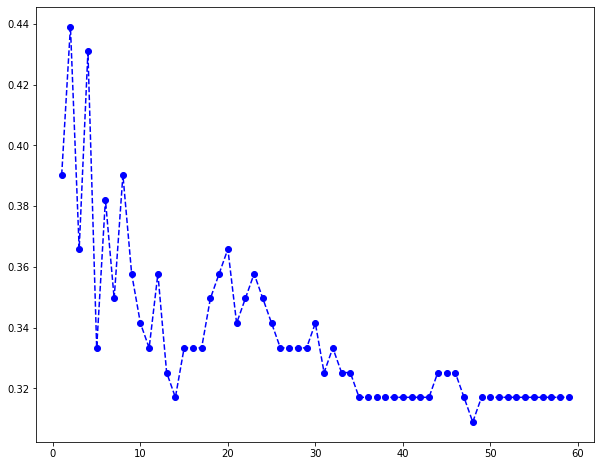

In [221]:
plt.figure(figsize=(10,8))
plt.plot(range(1,60),error_rate,color='blue', linestyle='dashed', marker='o')

#
K Value near about 35 for maximun accuracy
Train model again for k value 35

In [222]:
knn = KNeighborsClassifier(n_neighbors=35)

In [223]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=35, p=2,
                     weights='uniform')

In [224]:
KNN_pred = knn.predict(X_test)

In [225]:
print(confusion_matrix(Y_test,KNN_pred))
print(classification_report(Y_test,KNN_pred))

[[ 0 39]
 [ 0 84]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        39
           1       0.68      1.00      0.81        84

    accuracy                           0.68       123
   macro avg       0.34      0.50      0.41       123
weighted avg       0.47      0.68      0.55       123



/home/abhimat/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Decision Tree Algorithm

In [151]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,Y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [226]:
DecisionTree_pred = dtree.predict(X_test)

In [227]:
print(classification_report(Y_test,DecisionTree_pred))
print(confusion_matrix(Y_test,DecisionTree_pred))

              precision    recall  f1-score   support

           0       0.62      0.51      0.56        39
           1       0.79      0.86      0.82        84

    accuracy                           0.75       123
   macro avg       0.71      0.68      0.69       123
weighted avg       0.74      0.75      0.74       123

[[20 19]
 [12 72]]


# Random Forest Algorithm

In [154]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [228]:
RandomForest_pred = rfc.predict(X_test)

In [229]:
print(confusion_matrix(Y_test,RandomForest_pred))
print(classification_report(Y_test,RandomForest_pred))

[[20 19]
 [10 74]]
              precision    recall  f1-score   support

           0       0.67      0.51      0.58        39
           1       0.80      0.88      0.84        84

    accuracy                           0.76       123
   macro avg       0.73      0.70      0.71       123
weighted avg       0.75      0.76      0.75       123



# Support Vector Machine Algorithm

In [157]:
from sklearn.svm import SVC


In [158]:
model = SVC()

In [159]:
model.fit(X_train,Y_train)

/home/abhimat/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [230]:
SVM_pred = model.predict(X_test)

In [231]:
print(confusion_matrix(Y_test,SVM_pred))
print(classification_report(Y_test,SVM_pred))

[[ 0 39]
 [ 0 84]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        39
           1       0.68      1.00      0.81        84

    accuracy                           0.68       123
   macro avg       0.34      0.50      0.41       123
weighted avg       0.47      0.68      0.55       123



/home/abhimat/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# NAIVE BAYES ALGORITHM

In [162]:
from sklearn.naive_bayes import GaussianNB 
nb=GaussianNB()
nb.fit(X_train,Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [232]:
NaiveBayes_pred=nb.predict(X_test)

In [233]:
print(confusion_matrix(Y_test,NaiveBayes_pred))
print(classification_report(Y_test,NaiveBayes_pred))

[[18 21]
 [ 4 80]]
              precision    recall  f1-score   support

           0       0.82      0.46      0.59        39
           1       0.79      0.95      0.86        84

    accuracy                           0.80       123
   macro avg       0.81      0.71      0.73       123
weighted avg       0.80      0.80      0.78       123



# Gradient Boosting Machine Algorithm

In [165]:
from sklearn.ensemble import GradientBoostingClassifier
gbma=GradientBoostingClassifier()
gbma.fit(X_train,Y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [234]:
GBM_pred=gbma.predict(X_test)

In [235]:
print(confusion_matrix(Y_test,GBM_pred))
print(classification_report(Y_test,GBM_pred))

[[19 20]
 [ 9 75]]
              precision    recall  f1-score   support

           0       0.68      0.49      0.57        39
           1       0.79      0.89      0.84        84

    accuracy                           0.76       123
   macro avg       0.73      0.69      0.70       123
weighted avg       0.75      0.76      0.75       123

